In [1]:
from prophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [2]:
import codecs
with codecs.open("./data/nikkei_stock_average_monthly_jp.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")
df.head()

,データ日付,終値,始値,高値,安値
0,2000/01/01,19539.70,19002.86,19539.70,18168.27
1,2000/02/01,19959.52,19423.38,20007.77,19367.83
2,2000/03/01,20337.32,20081.67,20706.65,19078.60
3,2000/04/01,17973.70,20726.99,20833.21,17973.70
4,2000/05/01,16332.45,18403.08,18439.36,16008.14


In [3]:
df = df.rename(columns={"データ日付":"date", "終値":"closing_price", "始値":"open_price", "高値":"higher_price", "安値":"lower_price"})
df = df[:-1]
print(len(df))
df.head()

267


,date,closing_price,open_price,higher_price,lower_price
0,2000/01/01,19539.70,19002.86,19539.70,18168.27
1,2000/02/01,19959.52,19423.38,20007.77,19367.83
2,2000/03/01,20337.32,20081.67,20706.65,19078.60
3,2000/04/01,17973.70,20726.99,20833.21,17973.70
4,2000/05/01,16332.45,18403.08,18439.36,16008.14


In [4]:
#日付の処理
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,closing_price,open_price,higher_price,lower_price
0,2000-01-01,19539.70,19002.86,19539.70,18168.27
1,2000-02-01,19959.52,19423.38,20007.77,19367.83
2,2000-03-01,20337.32,20081.67,20706.65,19078.60
3,2000-04-01,17973.70,20726.99,20833.21,17973.70
4,2000-05-01,16332.45,18403.08,18439.36,16008.14


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

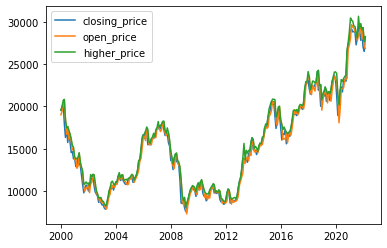

In [6]:
t = df.date
for i in range(1,4):
    y = df.iloc[:, i]
    plt.plot(t,y, label=df.columns[i])
plt.legend()
plt.show()

In [7]:
#予測
m = Prophet(seasonality_mode="multiplicative")
df_closing = df[["date", "closing_price"]].rename(columns={"date":"ds", "closing_price":"y"})
m.fit(df_closing)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.7648


/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       490.018    0.00702188       82.8067     0.06965           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       490.241    0.00540039       84.8837   6.108e-05       0.001      182  LS failed, Hessian reset 
     158       490.692    0.00036046       72.1399    3.93e-06       0.001      293  LS failed, Hessian reset 
     199       490.711   2.40917e-05       80.6129           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       491.415   0.000209456       78.9012           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       491.441   8.52599e-05       75.6972   1.264e-06       0.001      536  LS failed, Hessian reset 
     399       491.509   5.09802e-05  

In [8]:
future = m.make_future_dataframe(periods=120, freq="MS")
future.tail()

,ds
382,2031-11-01
383,2031-12-01
384,2032-01-01
385,2032-02-01
386,2032-03-01


In [9]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
382,2031-11-01,43344.796925,39268.259924,47084.389757
383,2031-12-01,43564.239440,38897.197364,47439.790668
384,2032-01-01,43554.092052,39095.173160,47676.957430
385,2032-02-01,42951.945255,38688.290432,46876.155713
386,2032-03-01,43191.134081,38786.427480,47175.267857


<class 'matplotlib.figure.Figure'>


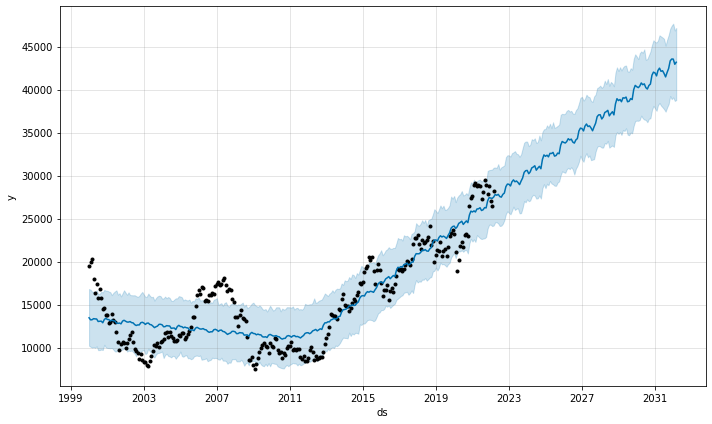

In [10]:
fig1 = m.plot(forecast)
print(type(fig1))

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


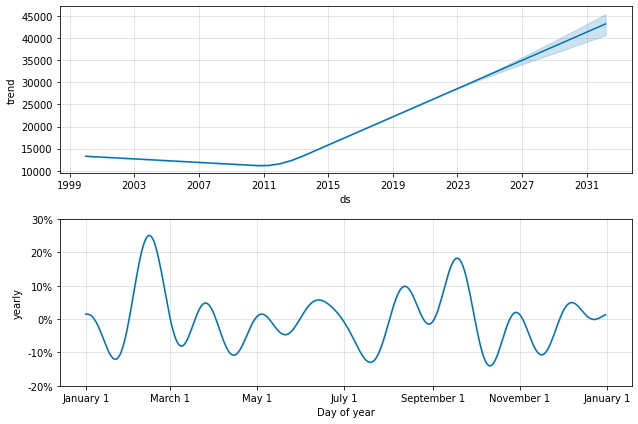

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
import pandas as pd
import pandas_datareader.data as web

In [13]:
df = web.DataReader("9020.T", data_source="yahoo", start="2000-01-01")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,5520.0,5480.0,5510.0,5510.0,2000.0,4052.732178
2000-01-05,5590.0,5480.0,5500.0,5590.0,2700.0,4111.572754
2000-01-06,5690.0,5500.0,5690.0,5500.0,2700.0,4045.375977
2000-01-07,5520.0,5450.0,5500.0,5510.0,4800.0,4052.732178
2000-01-10,5510.0,5510.0,5510.0,5510.0,0.0,4052.732178


In [14]:
df.shape
df.reset_index(inplace=True)
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
df_predict = df[["Date", "Adj Close"]].rename(columns={"Date":"ds", "Adj Close":"y"})
df_predict.head()

,ds,y
0,2000-01-04,4052.732178
1,2000-01-05,4111.572754
2,2000-01-06,4045.375977
3,2000-01-07,4052.732178
4,2000-01-10,4052.732178


In [16]:
m = Prophet()
m.fit(df_predict)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.0738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12711.7    0.00798564       3020.85           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13077.6    0.00548324       1776.79      0.6023      0.6023      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13288.1     0.0055118       998.437           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13415.1     0.0449099       388.365      0.7796      0.7796      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13484.9    0.00250867       873.167      0.3636      0.3636      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [17]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5933,2023-03-28
5934,2023-03-29
5935,2023-03-30
5936,2023-03-31
5937,2023-04-01


In [18]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
5928,2023-03-23,5796.418779,4830.389535,6860.327904
5929,2023-03-24,5793.654967,4717.125043,6822.124794
5930,2023-03-25,5804.816837,4806.042769,6905.480502
5931,2023-03-26,5805.864168,4725.749869,6796.619168
5932,2023-03-27,5792.559800,4793.293207,6956.942864
5933,2023-03-28,5806.840047,4762.474500,6856.701823
5934,2023-03-29,5805.494520,4670.603769,6950.702759
5935,2023-03-30,5802.733249,4754.758228,6778.398349
5936,2023-03-31,5799.152352,4683.797633,6891.772141
5937,2023-04-01,5809.420382,4732.405533,6943.647854


matplotlib.figure.Figure

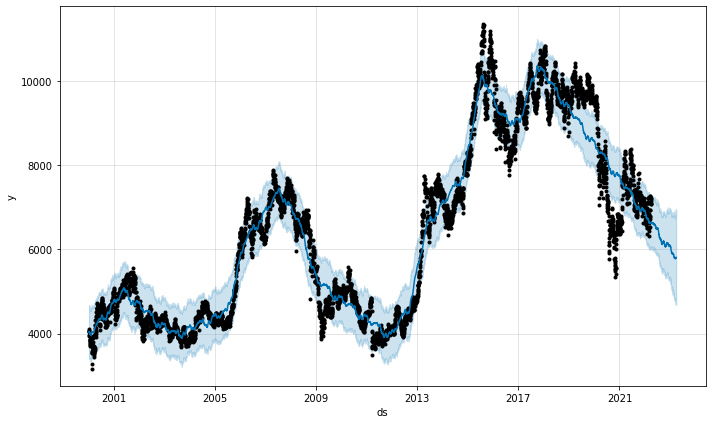

In [19]:
fig1 = m.plot(forecast)
type(fig1)

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


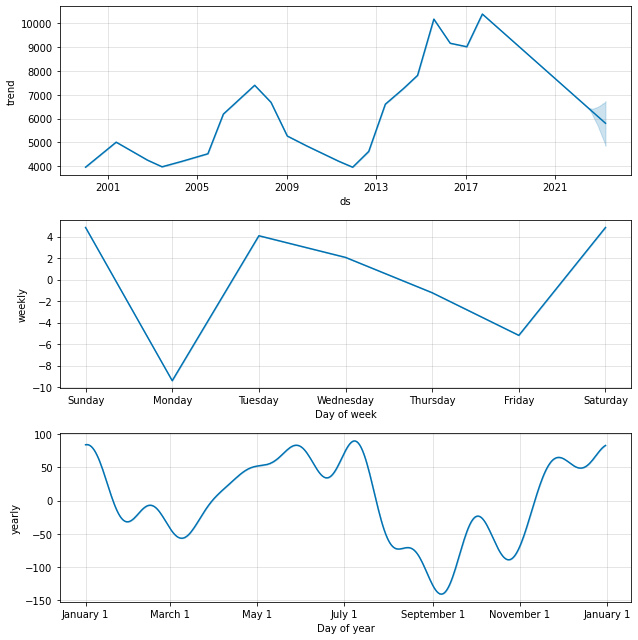

In [20]:
fig2 = m.plot_components(forecast)

In [22]:
df = pd.read_excel("../templates/data_j.xlsx")
df = df[["コード","銘柄名","市場・商品区分", "33業種コード", "33業種区分"]]
df.head()

,コード,銘柄名,市場・商品区分,33業種コード,33業種区分
0,1301,極洋,市場第一部（内国株）,50,水産・農林業
1,1305,ダイワ上場投信－トピックス,ETF・ETN,-,-
2,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-
3,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-
4,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-


In [28]:
code = df[df["銘柄名"]=="極洋"]["コード"].values[0]
code

1301

In [ ]:
special = df[df["33業種コード"] == "-"]
special

In [ ]:
igai33 = list(set(special["市場・商品区分"].tolist()))
igai33

In [ ]:
data = {}
for content in igai33:
    kind = special[special["市場・商品区分"]==content]
    data[content] = kind["銘柄名"].tolist()
    print(len(data[content]))
kind["銘柄名"]

In [ ]:
data

In [ ]:
import numpy as np
df2 = df.replace({"-": np.nan})

In [ ]:
df_33 = df[(df["33業種コード"] != "-") & (df["33業種区分"] != "-")] 
df_33

In [ ]:
gyousyu33 = list(set(df_33["33業種区分"].tolist()))
gyousyu33

In [ ]:
for content in gyousyu33:
    kind = df_33[df_33["33業種区分"] == content]
    data[content] = kind["銘柄名"].tolist()
data

In [ ]:
print(data.keys())

In [ ]:
# データの受け取り先は改訂予定
df = pd.read_excel("../templates/data_j.xlsx")
df = df[["コード","銘柄名","市場・商品区分", "33業種コード", "33業種区分"]]

#33業種以外の物を抽出
special = df[df["33業種コード"] == "-"]

#33業種以外の銘柄名をリスト化
igai33 = list(set(special["市場・商品区分"].tolist()))

#業種ごとに銘柄を辞書でまとめる1
data = {}
for content in igai33:
    kind = special[special["33業種区分"] == content]
    data[content] = kind["銘柄名"].tolist()

#33業種を抽出
df_33 = df[(df["33業種コード"] != "-") & (df["33業種区分"] != "-")] 

# 33業種をリスト化

gyousyu33 = list(set(df_33["33業種区分"].tolist()))

#業種ごとに銘柄を辞書でまとめる2
for content in gyousyu33:
    kind = df_33[df_33["33業種区分"] == content]
    data[content] = kind["銘柄名"].tolist()

gyousyu33.extend(igai33)

In [ ]:
data